<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Underfitting_%26_Overfitting_(kNN_%26_Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Underfitting & Overfitting in kNN**

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bankloan.csv to bankloan.csv


In [ ]:
bankloan = pd.read_csv('bankloan.csv')

In [ ]:
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [ ]:
bankloan.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [ ]:
features = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]
target = bankloan['default']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=33)

In [ ]:
k_range = [*range(1,100,2)]
training_accuracy = []
validation_accuracy = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  
  #training accuracy
  y_pred_train = knn.predict(x_train)
  training_accuracy.append(metrics.accuracy_score(y_train, y_pred_train))

  #validation accuracy
  y_pred_test = knn.predict(x_test)
  validation_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))

In [ ]:
df_knn = pd.DataFrame({'k': k_range, 'Training Accuracy' : training_accuracy, 'Validation Accuracy' : validation_accuracy})
df_knn.head()

,k,Training Accuracy,Validation Accuracy
0,1,1.000000,0.700000
1,3,0.858929,0.721429
2,5,0.832143,0.757143
3,7,0.814286,0.735714
4,9,0.812500,0.764286


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


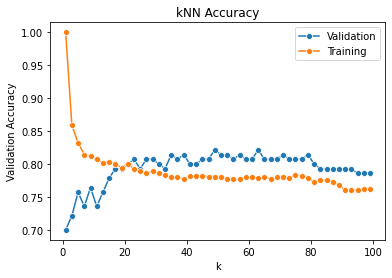

In [ ]:
plt.figure()
plt.title('kNN Accuracy')
sns.lineplot(x= 'k', y= 'Validation Accuracy', data=df_knn, label='Validation', marker='o')
sns.lineplot(x= 'k', y= 'Training Accuracy', data=df_knn, label='Training', marker='o')
plt.legend()
plt.show()

In [ ]:
df_knn['diff'] = np.abs(df_knn['Training Accuracy'] - df_knn['Validation Accuracy'])
df_knn[df_knn['diff'] == df_knn['diff'].min()]

,k,Training Accuracy,Validation Accuracy,diff
10,21,0.8,0.8,0.0


### **Model Complexity in Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
#scaling
min_max = MinMaxScaler()
x_train_scaled = min_max.fit_transform(x_train)
x_test_scaled = min_max.fit_transform(x_test)

In [ ]:
max_depth = [*range(1,25)]
train_accuracy = []
test_accuracy = []

for i in max_depth:
  clf = DecisionTreeClassifier(max_depth=i)
  clf.fit(x_train_scaled, y_train)

  #training accuracy
  y_pred_train = clf.predict(x_train_scaled)
  train_accuracy.append(metrics.accuracy_score(y_train, y_pred_train))

  #validation accuracy
  y_pred_test = clf.predict(x_test_scaled)
  test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))

In [ ]:
df_dectree = pd.DataFrame({'max depth':max_depth, 'training accuracy':train_accuracy, 'test accuracy':test_accuracy})
df_dectree.head()

,max depth,training accuracy,test accuracy
0,1,0.753571,0.750000
1,2,0.773214,0.800000
2,3,0.801786,0.792857
3,4,0.816071,0.735714
4,5,0.839286,0.721429


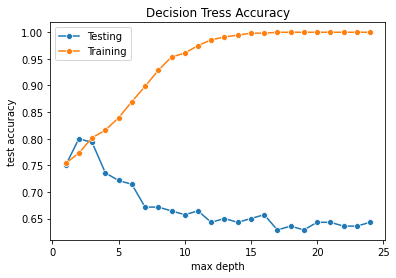

In [ ]:
plt.figure()
plt.title('Decision Tress Accuracy')
sns.lineplot(x= 'max depth', y= 'test accuracy', data=df_dectree, label='Testing', marker='o')
sns.lineplot(x= 'max depth', y= 'training accuracy', data=df_dectree, label='Training', marker='o')
plt.legend()
plt.show()

In [ ]:
df_dectree['diff'] = np.abs(df_dectree['training accuracy'] - df_dectree['test accuracy'])

In [ ]:
df_dectree[df_dectree['diff'] == df_dectree['diff'].min()]

,max depth,training accuracy,test accuracy,diff
0,1,0.753571,0.75,0.003571
